<a href="https://colab.research.google.com/github/christiandaso/Proyectos-Data-Science/blob/main/CI_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import pingouin as pg
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/iq dataset to experiment.csv', encoding='latin-1')
df.head()

,gpa,ci,sexo,Mes de ingreso,Año de estudio,Edad
0,7.940,111,2,1,1,1
1,8.292,107,2,1,2,3
2,4.643,100,2,1,1,1
3,7.470,107,2,1,2,2
4,8.882,114,1,1,1,2


In [ ]:
df = df[['ci','Mes de ingreso', 'Año de estudio', 'Edad']]
df.describe()

,ci,Mes de ingreso,Año de estudio,Edad
count,78.000000,78.000000,78.000000,78.000000
mean,108.923077,1.525641,1.423077,1.948718
std,13.170973,0.502574,0.497245,0.820159
min,72.000000,1.000000,1.000000,1.000000
25%,103.000000,1.000000,1.000000,1.000000
50%,110.000000,2.000000,1.000000,2.000000
75%,117.500000,2.000000,2.000000,3.000000
max,136.000000,2.000000,2.000000,3.000000


<Axes: >

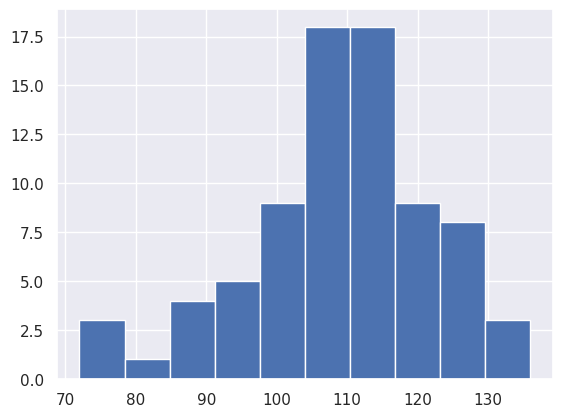

In [ ]:
df.ci.hist(bins = 10)

In [ ]:
df.corr()

,ci,Mes de ingreso,Año de estudio,Edad
ci,1.000000,0.057199,-0.197231,-0.129010
Mes de ingreso,0.057199,1.000000,-0.121926,0.003232
Año de estudio,-0.197231,-0.121926,1.000000,0.722636
Edad,-0.129010,0.003232,0.722636,1.000000


In [ ]:
df_anova = pg.anova(
    data=df,
    dv='ci',
    between = ['Edad','Mes de ingreso','Año de estudio'],
    detailed = True
).round(4)
df_anova

,Source,SS,DF,MS,F,p-unc,np2
0,Edad,345644.3135,2.0,172822.1568,976.2184,0.0000,0.9663
1,Mes de ingreso,0.0000,1.0,0.0000,0.0000,1.0000,0.0000
2,Año de estudio,39245.3533,1.0,39245.3533,221.6848,0.0000,0.7653
3,Edad * Mes de ingreso,102.1712,2.0,51.0856,0.2886,0.7502,0.0084
4,Edad * Año de estudio,23822.3643,2.0,11911.1822,67.2826,0.0000,0.6643
5,Mes de ingreso * Año de estudio,1.8245,1.0,1.8245,0.0103,0.9194,0.0002
6,Edad * Mes de ingreso * Año de estudio,575.3749,2.0,287.6875,1.6251,0.2045,0.0456
7,Residual,12038.1938,68.0,177.0323,NaN,NaN,NaN


<Axes: xlabel='Edad', ylabel='ci'>

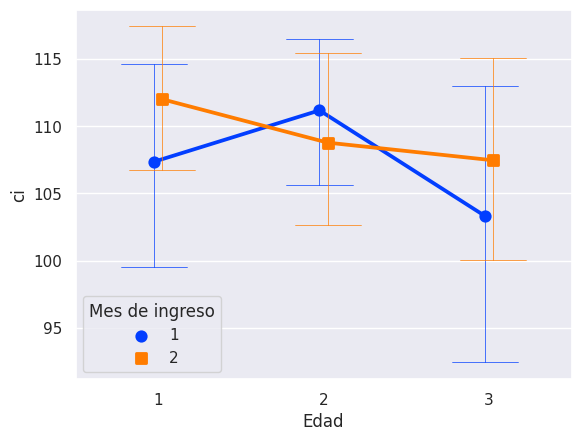

In [ ]:
#EDAD * MES DE INGRESO
#utilizando seaborn
sns.set()
sns.pointplot(data=df,
              x='Edad',
              y='ci',
              hue='Mes de ingreso',
              dodge=True,
              markers=['o', 's'],
              capsize= 0.4,
              errwidth= 0.5,
              palette='bright')

<Axes: xlabel='Edad', ylabel='ci'>

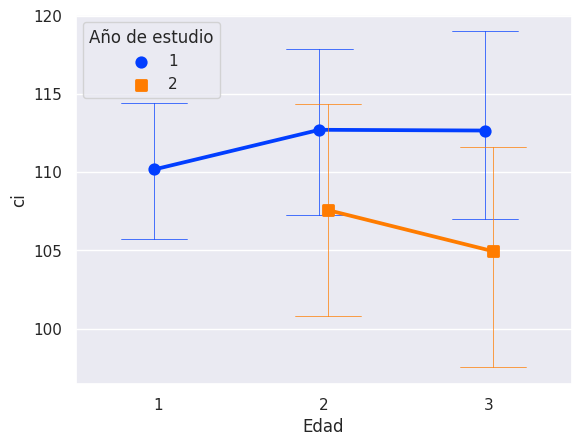

In [ ]:
#EDAD * MES DE INGRESO
#utilizando seaborn
sns.set()
sns.pointplot(data=df,
              x='Edad',
              y='ci',
              hue='Año de estudio',
              dodge=True,
              markers=['o', 's'],
              capsize= 0.4,
              errwidth= 0.5,
              palette='bright')

<Axes: xlabel='Mes de ingreso', ylabel='ci'>

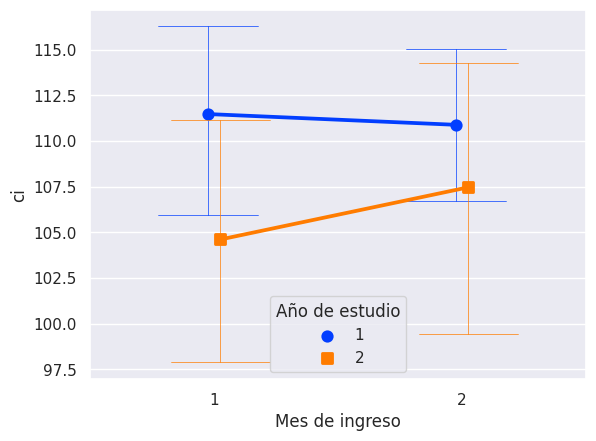

In [ ]:
#Mes de ingreso * Año de estudio
#utilizando seaborn
sns.set()
sns.pointplot(data=df,
              x='Mes de ingreso',
              y='ci',
              hue='Año de estudio',
              dodge=True,
              markers=['o', 's'],
              capsize= 0.4,
              errwidth= 0.5,
              palette='bright')

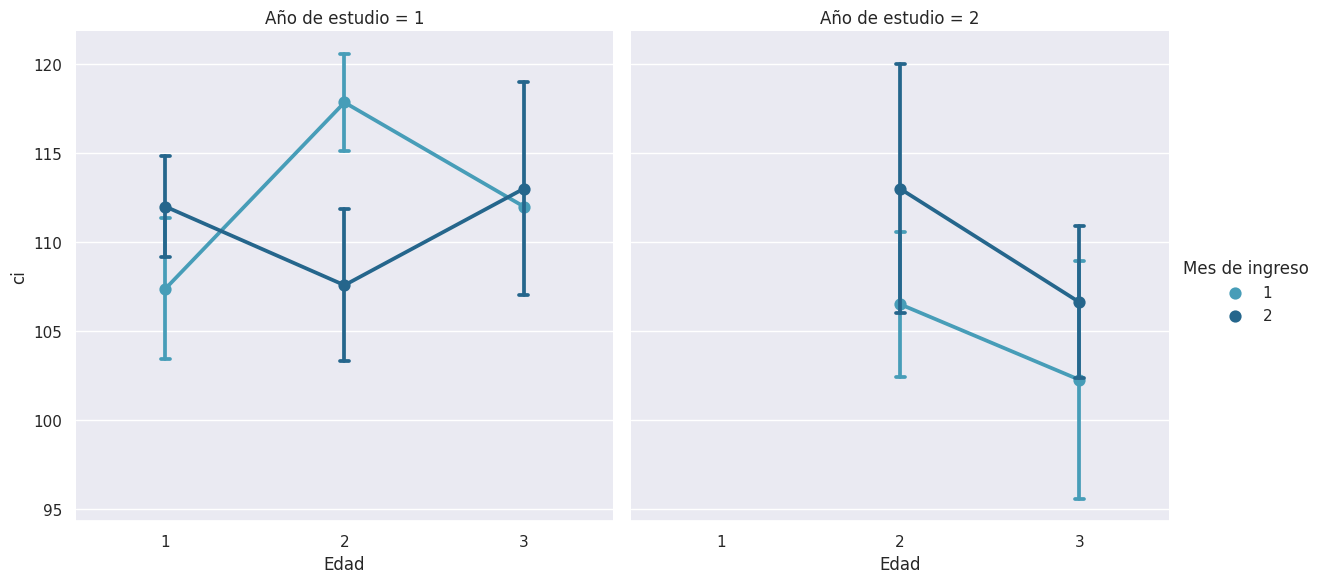

In [ ]:
#Edad * Mes de ingreso * Año de estudio
g = sns.catplot(
    data=df, x="Edad", y="ci", hue="Mes de ingreso", col="Año de estudio",
    capsize=.05, palette="YlGnBu_d", errorbar="se",
    kind="point", height= 6, aspect= 1,
)
g.despine(left=True)

In [ ]:
df_anova.to_csv('Anova_dise_Exp.csv')

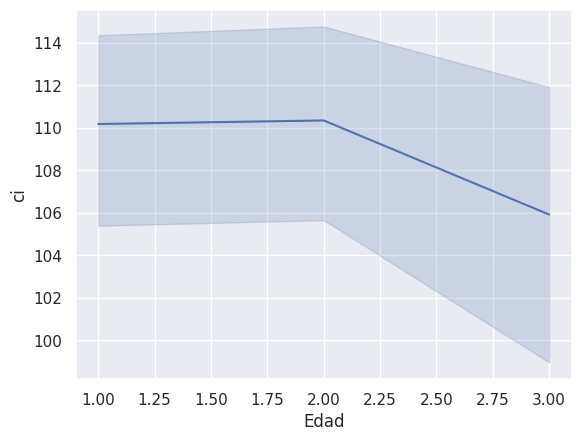

In [ ]:
sns.lineplot(x = "Edad", y = "ci", data = df);